## Importando as bibliotecas 
---

In [1]:
import os

import numpy as np
from skimage import util, transform, filters, color, measure, morphology
from sklearn import model_selection, neighbors, metrics, preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

np.random.seed(393)

%matplotlib notebook

## Importando o conjunto de dados
---

In [2]:
sets_path = os.path.join('C:/Users/henri/Documents/GitHub/SIN393---Projeto/Sets')
train_path = os.path.join(sets_path,'Train')
test_path = os.path.join(sets_path,'Test')

# Lista de classes geradas com base nas pastas no caminho de treino
classes_list = os.listdir(train_path)        

## Carregando imagens de treino
---

In [3]:
# Lista com as imagens de treino no dataset
image_list_train = []

# Listas com os rótulos de treino das imagens
label_list_train = []

# Listas com os nomes das imagens de treino
filename_list_train_ = []

# Percorre as classes do dataset
for classe in classes_list:
    
    # Listagem de todas as imagens na pasta daquela classe
    filename_list_train = os.listdir(os.path.join(train_path, classe))
    
    # Percorre os arquivos na pasta atual (treino)
    for filename in filename_list_train:
        # Carrega a imagem
        img_train = plt.imread(os.path.join(train_path, classe, filename))
        
        # Adiciona a imagem a lista de imagens
        image_list_train.append(img_train)
        
        # Adiciona o rótulo da imagem à lista de rótulos
        label_list_train.append(classe)
        
        # Adiciona o nome da imagem à uma lista (para fins de visualização)
        filename_list_train_.append(filename)

In [4]:
# Lista com os rótulos das imagens de treino      
print(label_list_train)

['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 

## Carregando imagens de teste
---

In [5]:
# Lista com as imagens de teste no dataset
image_list_test = []

# Listas com os rótulos das imagens de teste
label_list_test = []

# Listas com os nomes das imagens de teste
filename_list_test_ = []

# Percorre as classes do dataset
for classe in classes_list:
    
    # Listagem de todas as imagens na pasta daquela classe
    filename_list_test = os.listdir(os.path.join(test_path, classe))
    
    # Percorre os arquivos na pasta atual (teste)
    for filename in filename_list_test:
        # Carrega a imagem
        img_test = plt.imread(os.path.join(test_path, classe, filename))
        
        # Adiciona a imagem a lista de imagens
        image_list_test.append(img_test)
        
        # Adiciona o rótulo da imagem à lista de rótulos
        label_list_test.append(classe)
        
        # Adiciona o nome da imagem à uma lista (para fins de visualização)
        filename_list_test_.append(filename)

In [6]:
# Lista com os rótulos das imagens de teste      
print(label_list_test)

['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'bat', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beetle', 'beet

## Conversão dos nome das classes para índices numéricos
---

In [7]:
# Indices das classes dos objetos do dataset
_, _, label_list_train_idx = np.unique(label_list_train, return_index=True, return_inverse=True)
_, _, label_list_test_idx = np.unique(label_list_test, return_index=True, return_inverse=True)


## Plotando as imagens do conjunto de dados
---

In [8]:
# Seleciona apenas as primeiras N imagens de cada classe
image_list_temp = []
filename_list_temp = []

# Itera pelo número de classes
for i in range(4):
    # As 6 primeiras ocorrencias em que label é igual a 'i'.
    image_list_temp += [image_list_train[j] for j in np.where(label_list_train_idx==i)[0][:6]]
    filename_list_temp += [filename_list_train_[j] for j in np.where(label_list_train_idx==i)[0][:6]]


<IPython.core.display.Javascript object>


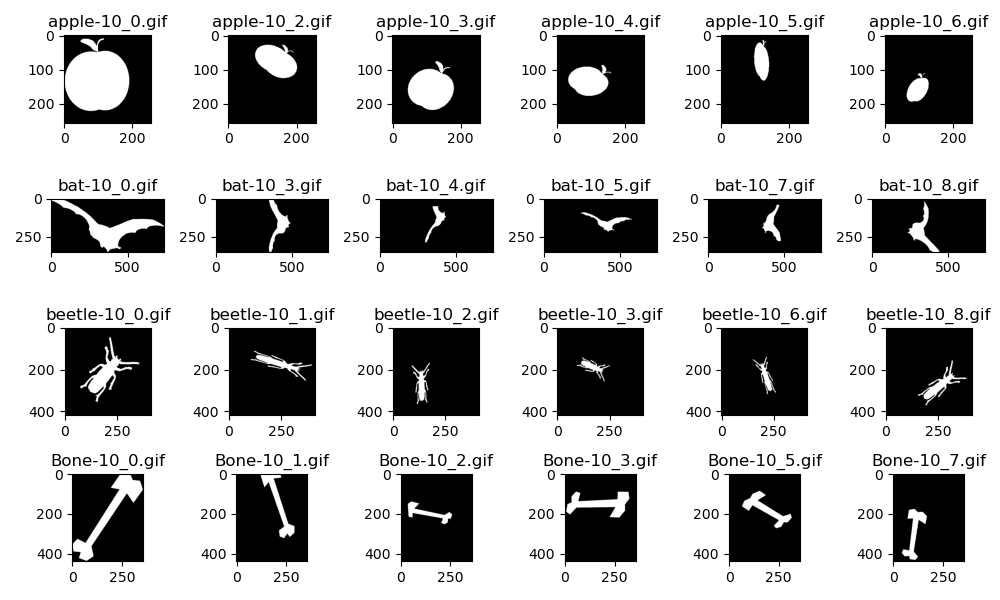

In [9]:
fig, ax = plt.subplots(4, 6, figsize=(10, 6))

for i, (image, filename) in enumerate(zip(image_list_temp, filename_list_temp)):
    ax[i//6, i%6].imshow(image, cmap=plt.cm.gray)
    ax[i//6, i%6].set_title(str(filename))
    #ax[i//6, i%6].axis('off')

fig.tight_layout()
plt.show()

## Extraindo caracteristicas das imagens
---

In [10]:
# Nomes das caracteristicas computadas
features = ['solidity', 'eccentricity', 'extent']

In [11]:
# Concatenção das informações das imagens de teste e treino
image_list = [*image_list_train, *image_list_test]
label_list = [*label_list_train, *label_list_test]
filename_list = [*filename_list_train_, *filename_list_test_]

# Arranjo 2D com as caracteristicas das imagens
feature_mat = []

# Lista com as imagens segmentadas (binárias)
seg_list = []

# Lista com os rótulos das imagens
list_label = []

for i, (image, label) in enumerate(zip(image_list, label_list)):
    
    # Adiciona o rótulos (label) da imagem à lista
    list_label.append(label)
    
    # Converte a imagem para float
    img_float = util.img_as_float(image)
    
    # Conversão das imagens rgb em niveis de cinza
    if img_float.shape[-1] == 4:
        img_float = color.rgb2gray(color.rgba2rgb(img_float))
    
    # Segmentação por limiarização usando Otsu
    img_seg = img_float > filters.threshold_otsu(img_float)
    
    # Remove objetos na imagem com menos de N pixels.
    img_seg = morphology.remove_small_objects(img_seg, 100)
    
    # Adiciona a imagem segmentada à lista.
    seg_list.append(img_seg)
    
    # Calcula a imagem de rótulos
    im_lbl = measure.label(img_seg)
    
    # Calcula uma lista de propriedades (caracteristicas) dos objetos na imagem
    props = measure.regionprops(im_lbl)
    
    if len(props) != 1:
        print(f'ERRO de segmentação: {len(props)}')
        continue
    
    # Itera pelas propriedades computadas
    for prop in props:
        solidity = prop.solidity 
        eccentricity = prop.eccentricity 
        extent = prop.extent 

        # Monta o vetor de caracteristicas deste objeto.
        feature_list = [solidity, eccentricity, extent]
    
    # Adiciona as caracteristicas desta imagem na matriz de caracteristicas
    feature_mat.append(feature_list)

In [12]:
# Converte a lista de caracteristicas para um arranjo NumPy
feature_map = np.array(feature_mat)

# Imprime a matriz de caracteristica
with np.printoptions(precision=4, suppress=True):
    print(feature_map)

[[0.9042 0.2478 0.7068]
 [0.9162 0.777  0.7045]
 [0.8991 0.3734 0.6674]
 ...
 [0.4535 0.9788 0.1881]
 [0.4507 0.9855 0.178 ]
 [0.4507 0.9855 0.178 ]]


In [13]:
# Algumas estatisticas sobre o conjunto de caracteristicas
with np.printoptions(precision=4, suppress=True):
    print(feature_map.min(0))
    print(feature_map.max(0))
    print(feature_map.mean(0))
    print(feature_map.std(0))

[0.3297 0.1595 0.089 ]
[0.9696 0.9985 0.7971]
[0.6227 0.8001 0.386 ]
[0.197  0.21   0.1894]


In [14]:
# Seleciona apenas as primeiras N imagens de cada classe
seg_list_temp = []
filename_list_temp = []

# Itera pelo número de classes
for i in range(4):
    # As 6 primeiras ocorrencias em que label é igual a 'i'.
    seg_list_temp += [seg_list[j] for j in np.where(label_list_train_idx==i)[0][:6]]
    filename_list_temp += [filename_list_train_[j] for j in np.where(label_list_train_idx==i)[0][:6]]

<IPython.core.display.Javascript object>


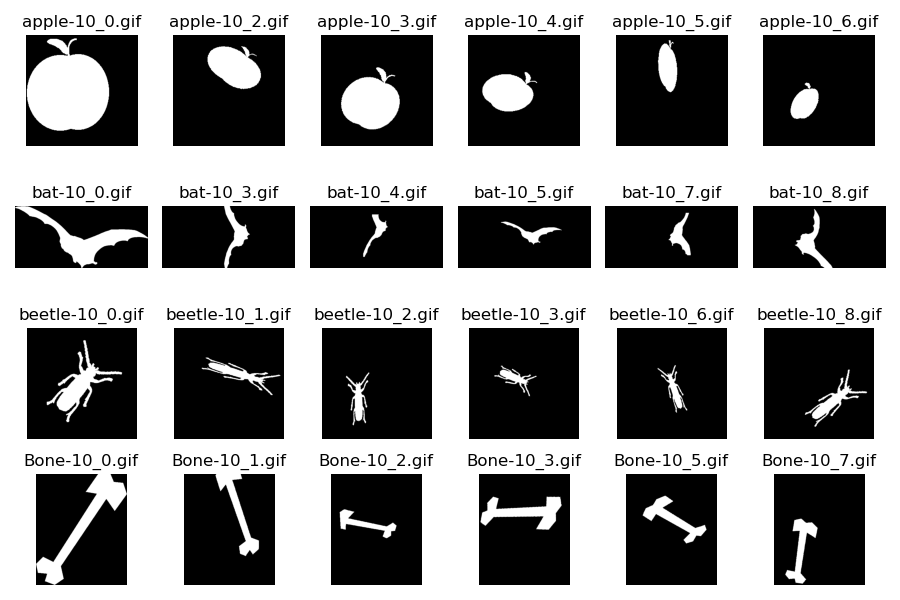

In [15]:
fig, ax  = plt.subplots(4, 6, figsize=(9, 6))

for i, (image, filename) in enumerate(zip(seg_list_temp, filename_list_temp)):
    ax[i//6, i%6].imshow(image, cmap='gray')
    ax[i//6, i%6].set_title(str(filename))
    ax[i//6, i%6].axis('off')
    
fig.tight_layout()
plt.show()

## Plotando caracteristicas computadas
---

In [16]:
df = pd.DataFrame(feature_map, columns=features)

df['class'] = label_list

display(df)

,solidity,eccentricity,extent,class
0,0.904154,0.247787,0.706766,apple
1,0.916241,0.776975,0.704500,apple
2,0.899108,0.373363,0.667385,apple
3,0.898984,0.675792,0.686684,apple
4,0.918016,0.925710,0.703591,apple
...,...,...,...,...
715,0.478761,0.981412,0.191727,bone
716,0.453541,0.978811,0.188115,bone
717,0.453541,0.978811,0.188115,bone
718,0.450704,0.985526,0.177989,bone


<IPython.core.display.Javascript object>


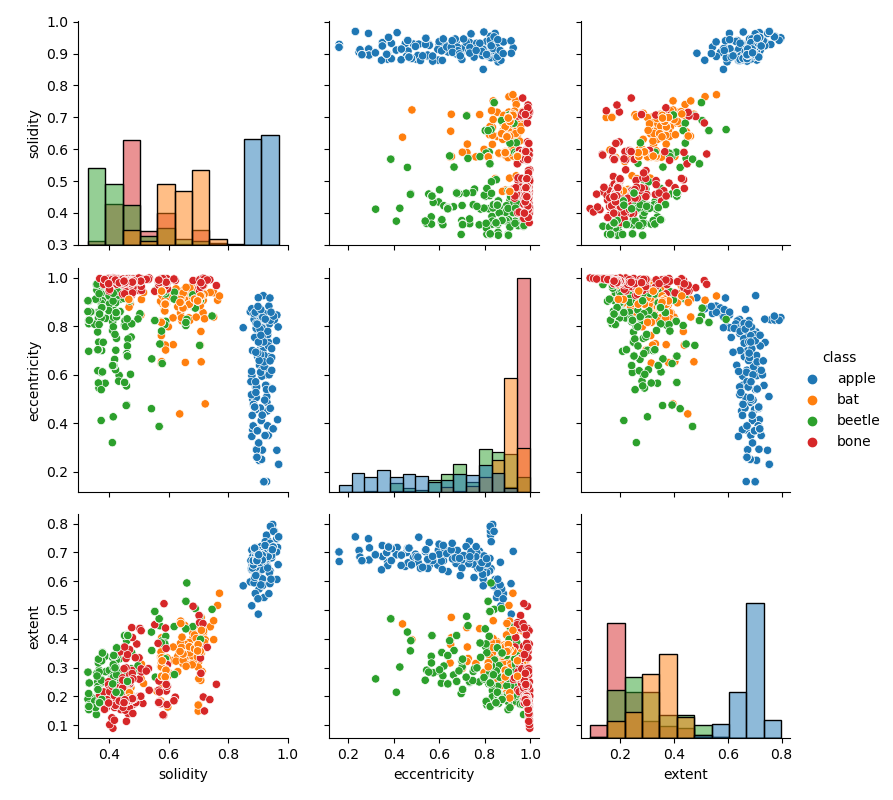

In [17]:
g = sns.PairGrid(df, hue='class', vars=features)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

## Validação cruzada - Hold-out
---

In [18]:
# Escolhendo as caracteristicas, (solidity, eccentricity, extent)
feature_map_ok = feature_map[:,:]

# Matriz de caracteristicas do conjunto de treino
X_train = feature_map_ok[0:len(image_list_train),:]

# Matriz de caracteristicas do conjunto de teste
X_test = feature_map_ok[len(image_list_train):,:]

# 30% do conjunto de Treino para validação.
X_train_1, X_val, y_train, y_val = model_selection.train_test_split(X_train, 
                                                                      label_list_train_idx, 
                                                                      test_size=0.3, 
                                                                      stratify=label_list_train_idx,
                                                                      random_state=393)

## Normalizando as caracteristicas
---

In [19]:
# Média das caracteristicas do conjunto de treinamento
X_train_1_mean = X_train_1.mean(0)

# Desvio padrão das caracteristicas do conjunto de treinamento
X_train_1_std = X_train_1.std(0)


In [20]:
# Transformada Normal de Caracteristicas (Manual)
# ----
X_train_norm = (X_train_1 - X_train_1_mean) / X_train_1_std
X_val_norm = (X_val - X_train_1_mean) / X_train_1_std
X_test_norm = (X_test - X_train_1_mean) / X_train_1_std

with np.printoptions(precision=4, suppress=True):
    print(f'Média do conjunto de treino antes de normalizar:  \t {np.array(X_train_1.mean(0))}')
    print(f'Desv. pad. do conjunto de treino antes de normalizar: \t {np.array(X_train_1.std(0))}')
    print('-----------------------------------------------')
    print(f'Média do conjunto de treino normalizado:  \t {np.array(X_train_norm.mean(0))}')
    print(f'Desv. pad. do conjunto de treino normalizado: \t {np.array(X_train_norm.std(0))}')

Média do conjunto de treino antes de normalizar:  	 [0.6263 0.8263 0.3864]
Desv. pad. do conjunto de treino antes de normalizar: 	 [0.1975 0.1784 0.186 ]
-----------------------------------------------
Média do conjunto de treino normalizado:  	 [0. 0. 0.]
Desv. pad. do conjunto de treino normalizado: 	 [1. 1. 1.]


In [21]:
with np.printoptions(precision=4, suppress=True):
    print(f'Treino: \t {X_train_norm.mean():.4f} ± {X_train_norm.std():.4f}')
    print(f'Validação: \t {X_val_norm.mean():.4f} ± {X_val_norm.std():.4f}')
    print(f'Teste:   \t {X_test_norm.mean():.4f} ± {X_test_norm.std():.4f}')

Treino: 	 0.0000 ± 1.0000
Validação: 	 -0.0085 ± 0.9791
Teste:   	 -0.1803 ± 1.2181


## Classificando utilizando KNN
---

C:\Users\henri\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\henri\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

<IPython.core.display.Javascript object>


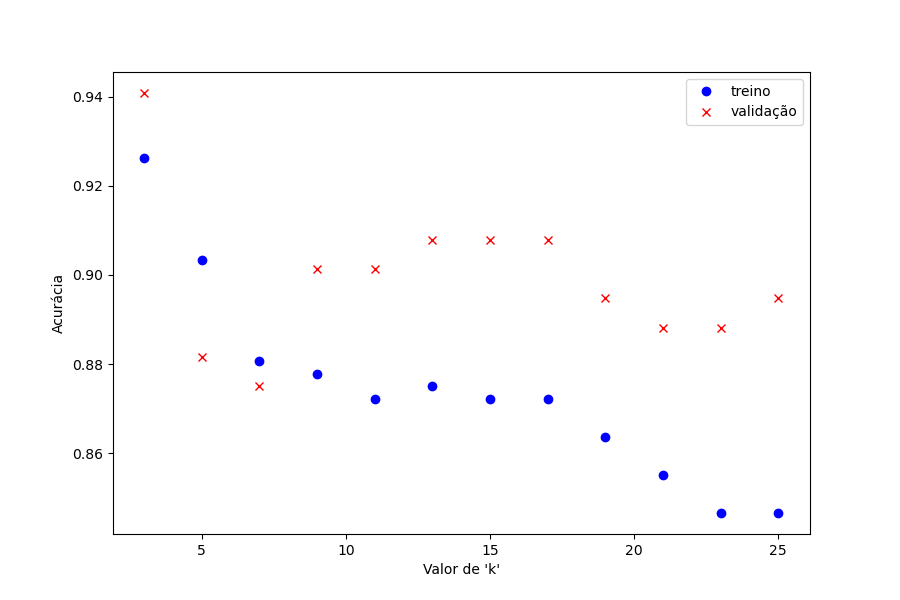

In [22]:
# Lista para otimização do valor de K
k_list = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]

# Lista com as acurácias de treino
acc_train_list = []
# Lista com as acurácias de validação
acc_val_list = []

for k_ in k_list:
    # Constrói um classificador K-NN. K = k_
    clf = neighbors.KNeighborsClassifier(n_neighbors=k_)

    # Treinando o classificador
    clf.fit(X_train_norm, y_train)

    # Testando o classificador (usando o conjunto de validação)
    pred = clf.predict(X_val_norm)
    acc_val = metrics.accuracy_score(y_val, pred)
    
    acc_val_list.append(acc_val)
    
    # Testando o classificador (usando o conjunto de treino)
    # **** Apenas para comparar com o resultado da validação ****
    pred_train = clf.predict(X_train_norm)
    acc_train = metrics.accuracy_score(y_train, pred_train)
    
    acc_train_list.append(acc_train)  

plt.figure(figsize=(9, 6))

plt.plot(k_list, acc_train_list, 'o', color='blue', label='treino')
plt.plot(k_list, acc_val_list, 'x', color='red', label='validação')
plt.xlabel("Valor de 'k'")
plt.ylabel("Acurácia")
plt.legend(loc='best')

plt.show()

In [23]:
print('k \t acc. treino \t acc. val')
print('----------------------------')
for k_, acc_t, acc_v in zip(k_list, acc_train_list, acc_val_list):
    print(f'{k_} \t {acc_t:.4f} \t {acc_v:.4f}')

k_best = k_list[np.argmax(acc_val_list)]
print(f'\nMelhor \'k\': {k_best} ({np.max(acc_val_list):.4f} acc.)')

k 	 acc. treino 	 acc. val
----------------------------
3 	 0.9261 	 0.9408
5 	 0.9034 	 0.8816
7 	 0.8807 	 0.8750
9 	 0.8778 	 0.9013
11 	 0.8722 	 0.9013
13 	 0.8750 	 0.9079
15 	 0.8722 	 0.9079
17 	 0.8722 	 0.9079
19 	 0.8636 	 0.8947
21 	 0.8551 	 0.8882
23 	 0.8466 	 0.8882
25 	 0.8466 	 0.8947

Melhor 'k': 3 (0.9408 acc.)


## Testando o classificador de acordo com o melhor k selecionado com o conjunto de testes.
---

In [24]:
# Constrói um classificador K-NN. K = k_best
clf = neighbors.KNeighborsClassifier(n_neighbors=k_best)

# Treinando o classificador
clf.fit(X_train_norm, y_train)

# Testando o classificador (usando o conjunto de TESTES)
pred = clf.predict(X_test_norm)
acc_val = metrics.accuracy_score(label_list_test_idx, pred)

C:\Users\henri\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Matriz de confusão e Relatório de classificação do conjunto de teste
---

In [25]:
print('\nMatriz de confusão:')
print(metrics.confusion_matrix(label_list_test_idx, pred))

print('\nRelatório de classificação:')
print(metrics.classification_report(label_list_test_idx, pred))

print(f'Acurácia obtida: {round((acc_val*100), 2)}%')


Matriz de confusão:
[[54  0  0  0]
 [ 0 54  0  0]
 [ 0  0 54  0]
 [ 0  2  0 52]]

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.96      1.00      0.98        54
           2       1.00      1.00      1.00        54
           3       1.00      0.96      0.98        54

    accuracy                           0.99       216
   macro avg       0.99      0.99      0.99       216
weighted avg       0.99      0.99      0.99       216

Acurácia obtida: 99.07%


## Testando o classificador
---

In [26]:
# Constrói um classificador K-NN. K = k_best
clf = neighbors.KNeighborsClassifier(n_neighbors=k_best)

# Treinando o classificador
clf.fit(X_train_norm, y_train)

# Testando o classificador (usando o conjunto de VALIDAÇÃO)
pred = clf.predict(X_val_norm)
acc_val = metrics.accuracy_score(y_val, pred)

C:\Users\henri\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Matriz de confusão e Relatório de classificação do conjunto de validação
---

In [27]:
# Constrói um classificador K-NN. K = k_best
clf = neighbors.KNeighborsClassifier(n_neighbors=k_best)

# Treinando o classificador
clf.fit(X_train_norm, y_train)

# Testando o classificador (usando o conjunto de VALIDAÇÃO)
pred = clf.predict(X_val_norm)
acc_val = metrics.accuracy_score(y_val, pred)

print('\nMatriz de confusão:')
print(metrics.confusion_matrix(y_val, pred))

print('\nRelatório de classificação:')
print(metrics.classification_report(y_val, pred))

print(f'Acurácia obtida: {round((acc_val*100), 2)}%')


Matriz de confusão:
[[38  0  0  0]
 [ 0 37  0  1]
 [ 0  4 33  1]
 [ 0  2  1 35]]

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.86      0.97      0.91        38
           2       0.97      0.87      0.92        38
           3       0.95      0.92      0.93        38

    accuracy                           0.94       152
   macro avg       0.94      0.94      0.94       152
weighted avg       0.94      0.94      0.94       152

Acurácia obtida: 94.08%


C:\Users\henri\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
